In [25]:
import pandas as pd
import matplotlib
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.1)
sns.set_palette('viridis')
from glob import glob
from pathlib import Path
import os
metric_nice = {
#     'auditor_fn_violation':'FN Violation',
#     'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS',
    'auc_roc':'1-AUROC',
    'subgroup_fpr':'Subgroup FP',
    'subgroup_fnr':'Subgroup FN',
}
hv_nice = {}
for k1,v1 in metric_nice.items():
    for k2,v2 in metric_nice.items():
        hv_nice.update({f'hv({k1}:{k2})': f'HV({v1}, {v2})'})
Order = [
    'fomo_nsga2_lr_fnr',
    'fomo_flex_lr_fnr',
    'fomo_lex_lr_fnr',
    'fomo_nsga2_xgb_fnr',
    'fomo_flex_xgb_fnr',
    'fomo_lex_xgb_fnr',
    
    'fomo_nsga2_lr_fnr_linear',
    'fomo_flex_lr_fnr_linear',
    'fomo_lex_lr_fnr_linear',
    'fomo_nsga2_xgb_fnr_linear',
    'fomo_flex_xgb_fnr_linear',   
    'fomo_lex_xgb_fnr_linear',
    
    'fomo_nsga2_lr_fnr_mlp',   
    'fomo_flex_lr_fnr_mlp',
    'fomo_lex_lr_fnr_mlp',
    'fomo_nsga2_xgb_fnr_mlp',      
    'fomo_flex_xgb_fnr_mlp',      
    'fomo_lex_xgb_fnr_mlp'
]
method_nice = {
    'fomo_nsga2_lr_fnr':'NSGA2-LR',
    'fomo_nsga2_lr_fpr':'NSGA2-LR',
    'fomo_nsga2_lr_fnr_linear':'NSGA2-LR-LIN',
    'fomo_nsga2_lr_fpr_linear':'NSGA2-LR-LIN',
    'fomo_nsga2_lr_fnr_mlp':'NSGA2-LR-NN',
    'fomo_nsga2_lr_fpr_mlp':'NSGA2-LR-NN',
    'fomo_nsga2_xgb_fnr':'NSGA2-RF',
    'fomo_nsga2_xgb_fpr':'NSGA2-RF',
    'fomo_nsga2_xgb_fnr_linear':'NSGA2-RF-LIN',
    'fomo_nsga2_xgb_fpr_linear':'NSGA2-RF-LIN',
    'fomo_nsga2_xgb_fnr_mlp':'NSGA2-RF-NN',
    'fomo_nsga2_xgb_fpr_mlp':'NSGA2-RF-NN',
    'fomo_flex_lr_fnr':'FLEX+NSGA2-LR',
    'fomo_flex_xgb_fnr':'FLEX+NSGA2-RF',
    'fomo_flex_lr_fnr_linear':'FLEX+NSGA2-LR-LIN',
    'fomo_flex_lr_fnr_mlp':'FLEX+NSGA2-LR-NN',
    'fomo_flex_xgb_fnr_linear':'FLEX+NSGA2-RF-LIN',
    'fomo_flex_xgb_fnr_mlp':'FLEX+NSGA2-RF-NN',
    'fomo_lex_lr_fnr':'FLEX-LR',
    'fomo_lex_xgb_fnr':'FLEX-RF',
    'fomo_lex_lr_fnr_linear':'FLEX-LR-LIN',
    'fomo_lex_lr_fnr_mlp':'FLEX-LR-NN',
    'fomo_lex_xgb_fnr_linear':'FLEX-RF-LIN',
    'fomo_lex_xgb_fnr_mlp':'FLEX-RF-NN'
}

# rdirs = ['../fair_gp/analysis/results/', '../results']
rdirs = [
      '../results/Run_15/synthetic1/normalized_hvs',
      '../results/Run_15/synthetic1W/normalized_hvs',
#    '../results/Run_15/synthetic1/normalized_hvs',
#     '../results_23-02-07/',
#     '../results_23-02-08/',
#     '../fair_gp/analysis/results/'
#    '../results/Run_10/results_combined'
]
figdir = 'figs15/hypervolume_comparison'
os.makedirs(figdir, exist_ok=True)

# load data 

In [26]:
# read csv files containing hypervolume data
frames = []
for rdir in rdirs:
    for f in Path(rdir).glob('*.csv'):
        df = pd.read_csv(f)
        # if 'adult0' in str(f):
        #     df['dataset'] = 'adult0'
        if 'synthetic1W' in str(f):
            df['dataset'] = 'synthetic1W'
        # if 'adultR' in str(f):
        #     df['dataset'] = 'adultR'
        # if 'adultR2' in str(f):
        #     df['dataset'] = 'adultR2'
        frames.append(df)
# convert train column to 'train', 'test'
df_all = pd.concat(frames)
#df_all = frames
for m, dfgm in df_all.groupby('method'):
    for d, dfgmd in dfgm.groupby('dataset'):
        print('# results for',m,'on',d,':',len(dfgmd))
df_all['fold'] = df_all['train'].apply(lambda x: 'train' if x else 'test')
print(df_all.method.unique())
print('seeds (',df_all.seed.nunique(),'):',','.join([str(i) for i in df_all.seed.unique()]))
df_all = df_all.loc[df_all.method.isin(Order)]
df_all['method_nice'] = df_all['method'].apply(lambda x: method_nice[x])
#df_all = df_all[df_all['dataset'] != 'mimic4']
#df_all = df_all[df_all['dataset'] != 'adultR2']
df_train = df_all[df_all.fold=='train']
df_test = df_all[df_all.fold=='test']

# results for fomo_flex_lr_fnr on synthetic1 : 50
# results for fomo_flex_lr_fnr on synthetic1W : 50
# results for fomo_flex_lr_fnr_linear on synthetic1 : 50
# results for fomo_flex_lr_fnr_linear on synthetic1W : 50
# results for fomo_flex_lr_fnr_mlp on synthetic1 : 50
# results for fomo_flex_lr_fnr_mlp on synthetic1W : 50
# results for fomo_flex_xgb_fnr on synthetic1 : 50
# results for fomo_flex_xgb_fnr on synthetic1W : 50
# results for fomo_flex_xgb_fnr_linear on synthetic1 : 50
# results for fomo_flex_xgb_fnr_linear on synthetic1W : 50
# results for fomo_flex_xgb_fnr_mlp on synthetic1 : 50
# results for fomo_flex_xgb_fnr_mlp on synthetic1W : 50
# results for fomo_lex_lr_fnr on synthetic1 : 50
# results for fomo_lex_lr_fnr on synthetic1W : 50
# results for fomo_lex_lr_fnr_linear on synthetic1 : 50
# results for fomo_lex_lr_fnr_linear on synthetic1W : 50
# results for fomo_lex_lr_fnr_mlp on synthetic1 : 50
# results for fomo_lex_lr_fnr_mlp on synthetic1W : 50
# results for fomo_lex_xg

In [27]:
OrderNice = []
for x in Order:
    if method_nice[x] not in OrderNice:
        OrderNice.append(method_nice[x])

In [14]:
df_all
#df_all[df_all['hv(subgroup_fnr:auc_roc)']<0]

,method,dataset,seed,time,train,hv(subgroup_fnr:auc_roc),fold,method_nice
0,fomo_flex_xgb_fnr_linear,synthetic1,12669,533.208289,True,0.998979,train,FLEX+NSGA2-RF-LIN
1,fomo_flex_xgb_fnr_linear,synthetic1,12669,533.208289,False,0.999235,test,FLEX+NSGA2-RF-LIN
0,fomo_nsga2_xgb_fnr_linear,synthetic1,10197,514.407800,True,0.999284,train,NSGA2-RF-LIN
1,fomo_nsga2_xgb_fnr_linear,synthetic1,10197,514.407800,False,0.998787,test,NSGA2-RF-LIN
0,fomo_lex_xgb_fnr,synthetic1,10132,344.285236,True,0.995994,train,FLEX-RF
...,...,...,...,...,...,...,...,...
1,fomo_lex_xgb_fnr_linear,syntheticW,19863,357.528920,False,0.997476,test,FLEX-RF-LIN
0,fomo_lex_lr_fnr_linear,syntheticW,13352,40.246432,True,0.868635,train,FLEX-LR-LIN
1,fomo_lex_lr_fnr_linear,syntheticW,13352,40.246432,False,0.878420,test,FLEX-LR-LIN
0,fomo_nsga2_xgb_fnr,syntheticW,10132,514.058771,True,0.999736,train,NSGA2-RF


In [15]:
df_test.groupby(['method','dataset'])['seed'].nunique().unstack()

dataset,synthetic1,syntheticW
method,,
fomo_flex_lr_fnr,25,25
fomo_flex_lr_fnr_linear,25,25
fomo_flex_lr_fnr_mlp,25,25
fomo_flex_xgb_fnr,25,25
fomo_flex_xgb_fnr_linear,25,25
fomo_flex_xgb_fnr_mlp,25,25
fomo_lex_lr_fnr,25,25
fomo_lex_lr_fnr_linear,25,25
fomo_lex_lr_fnr_mlp,25,25


In [16]:
df_test.groupby(['method','dataset']).count()

seed  time  train  \
method                    dataset                         
fomo_flex_lr_fnr          synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_flex_lr_fnr_linear   synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_flex_lr_fnr_mlp      synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_flex_xgb_fnr         synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_flex_xgb_fnr_linear  synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_flex_xgb_fnr_mlp     synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_lr_fnr           synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_lr_fnr_linear    synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_lr_fnr_mlp       synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_xgb_fnr          synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_xgb_fnr_linear   synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_lex_xgb_fnr_mlp      synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_lr_fnr         synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_lr_fnr_linear  synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_lr_fnr_mlp     synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_xgb_fnr        synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_xgb_fnr_linear synthetic1    25    25     25   
                          syntheticW    25    25     25   
fomo_nsga2_xgb_fnr_mlp    synthetic1    25    25     25   
                          syntheticW    25    25     25   

                                      hv(subgroup_fnr:auc_roc)  fold  \
method                    dataset                                      
fomo_flex_lr_fnr          synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_flex_lr_fnr_linear   synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_flex_lr_fnr_mlp      synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_flex_xgb_fnr         synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_flex_xgb_fnr_linear  synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_flex_xgb_fnr_mlp     synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_lr_fnr           synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_lr_fnr_linear    synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_lr_fnr_mlp       synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_xgb_fnr          synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_xgb_fnr_linear   synthetic1                        25    25   
                          syntheticW                        25    25   
fomo_lex_xgb_fnr_mlp      synthetic1                        25    2

## training results

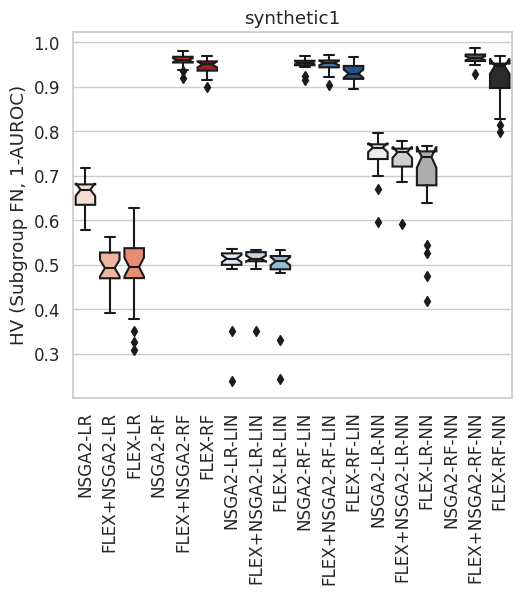

In [10]:
plot_cols = [c for c in df_all.columns if 'hv' in c]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
for col in plot_cols:
    h = plt.figure(figsize=(10,10))
    i = 1
    for dataset,dfg in df_train.groupby('dataset'):
        ax = h.add_subplot(2,2,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette=color_palette)
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%3 ==1:
            plt.ylabel('HV (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
#         if i < 3:
#             ax.set_xticklabels([])
#             ax.set_xlabel('')
#         else:

        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig(figdir+'/train_'+col.replace('(','-').replace(':','-')[:-1] +'.png',
               bbox_inches='tight')

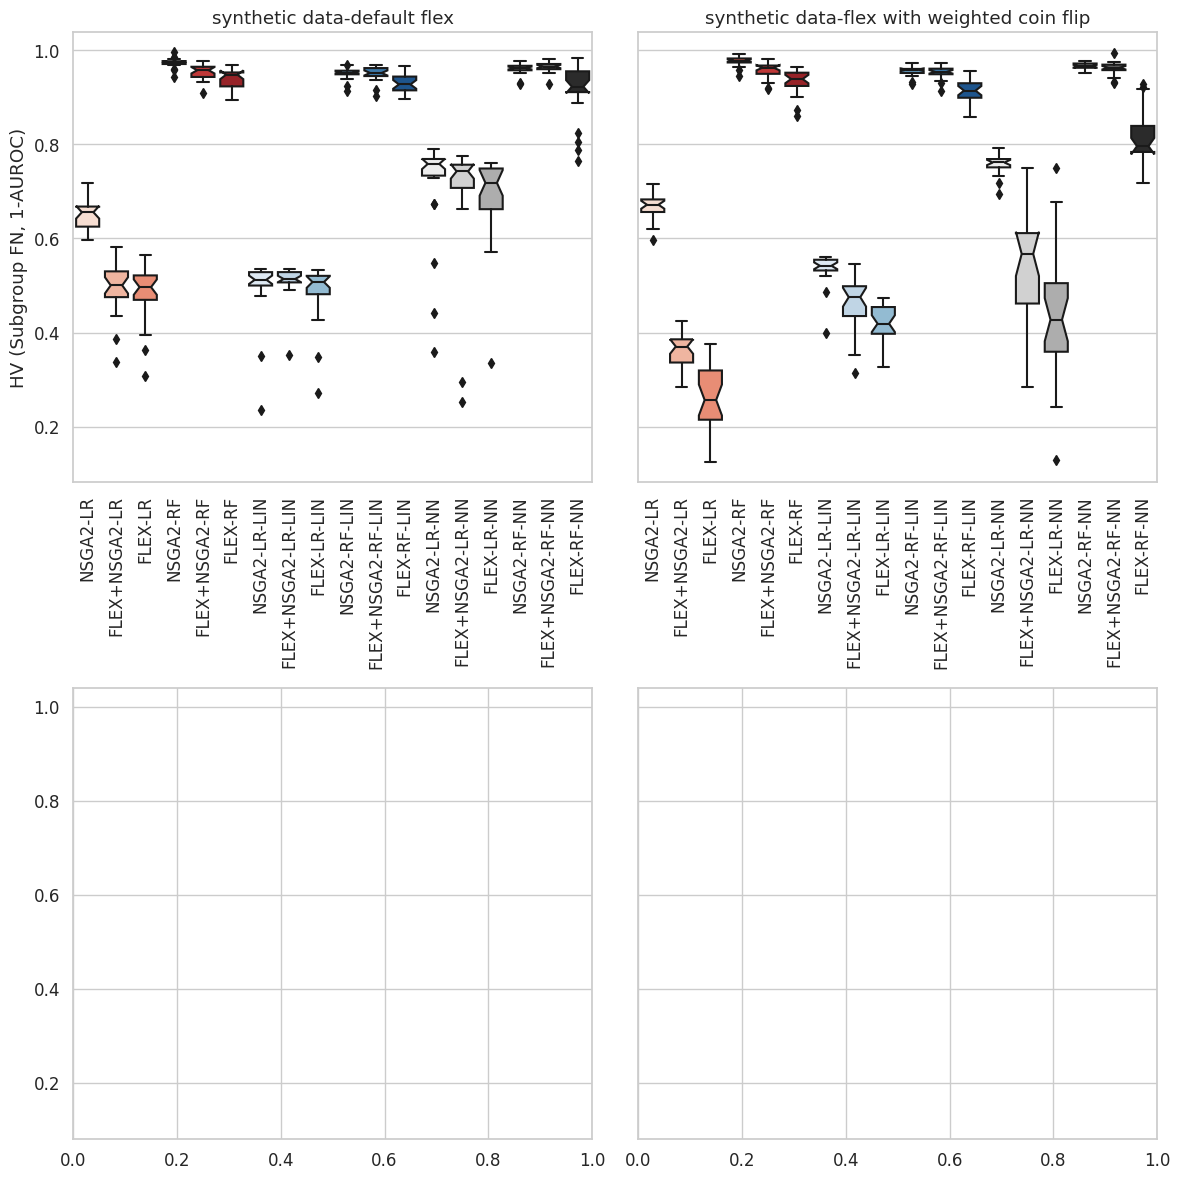

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_cols = [c for c in df_all.columns if 'hv(subgroup_fnr:auc_roc)' in c]
# train = df_train[df_train['dataset'].str.contains('ACSIncome')]
# test = df_test[df_test['dataset'].str.contains('ACSIncome')]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
#titles = {'adult':'adult-default flex','adultW':'adult-flex with weighted coin flip','adultR':'adult-random selection','adult0':'adult-no evolution'}
titles = {'synthetic1':'synthetic data-default flex','synthetic1W':'synthetic data-flex with weighted coin flip'}
for col in plot_cols:
    h, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)  # Set sharey=True

    i = 1
    for ax, (dataset, dfg) in zip(axes.flatten(), df_train.groupby('dataset')):
        sns.boxplot(data=dfg, x='method_nice', y=col, notch=True, order=OrderNice, palette=color_palette, ax=ax)
        #ax.set_title(dataset)
        ax.set_title(titles[dataset])
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i % 2 == 1:
            ax.set_ylabel('HV (' + y1 + ', ' + y2 + ')')
        else:
            ax.set_ylabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_xlabel('')
        i += 1

    plt.tight_layout()
    plt.savefig(figdir + '/train_' + col.replace('(', '-').replace(':', '-')[:-1] + '.png', bbox_inches='tight')


#### test results

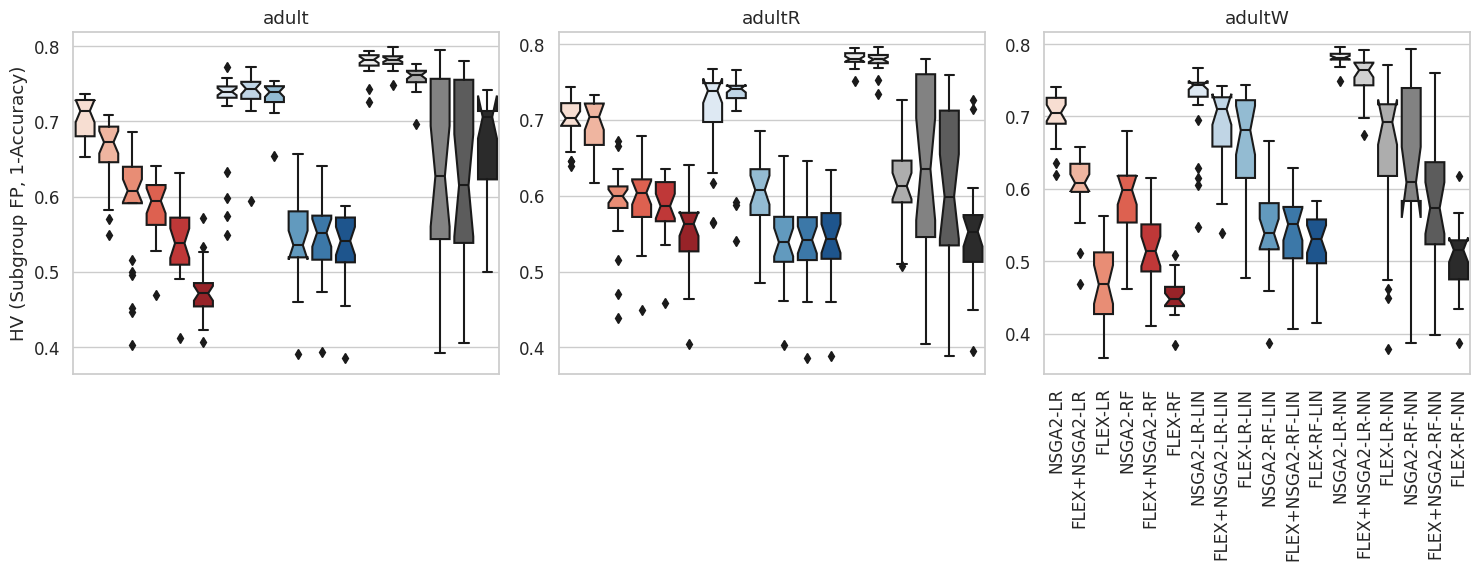

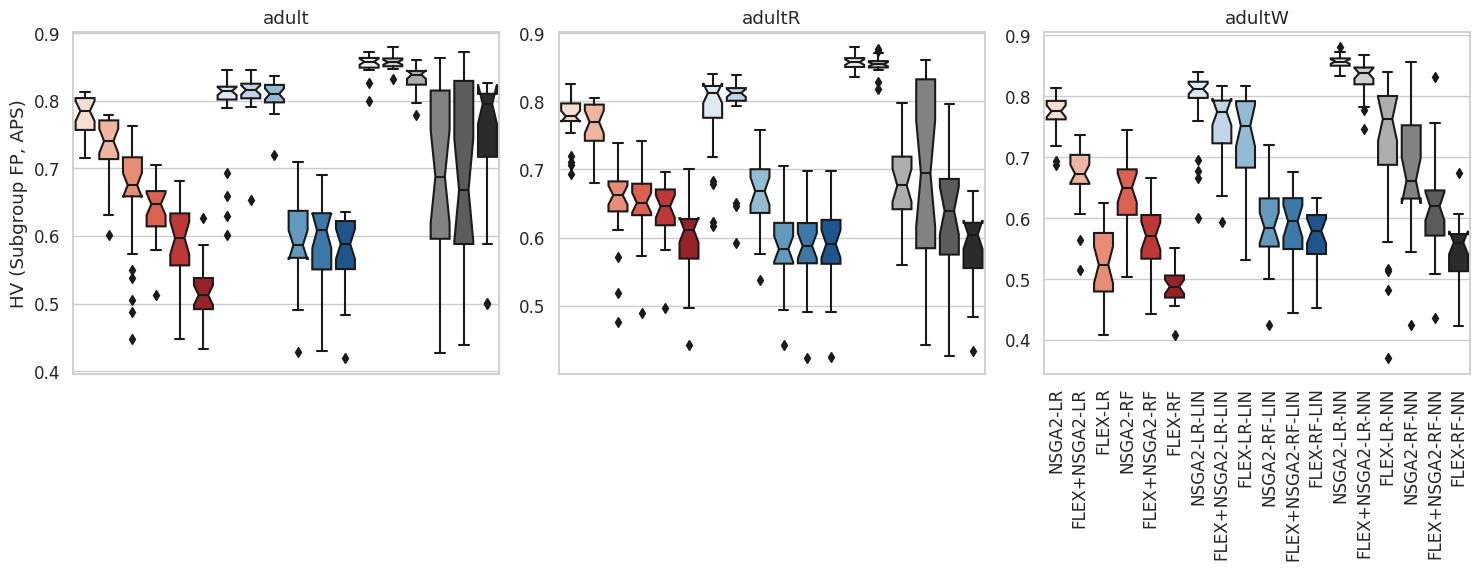

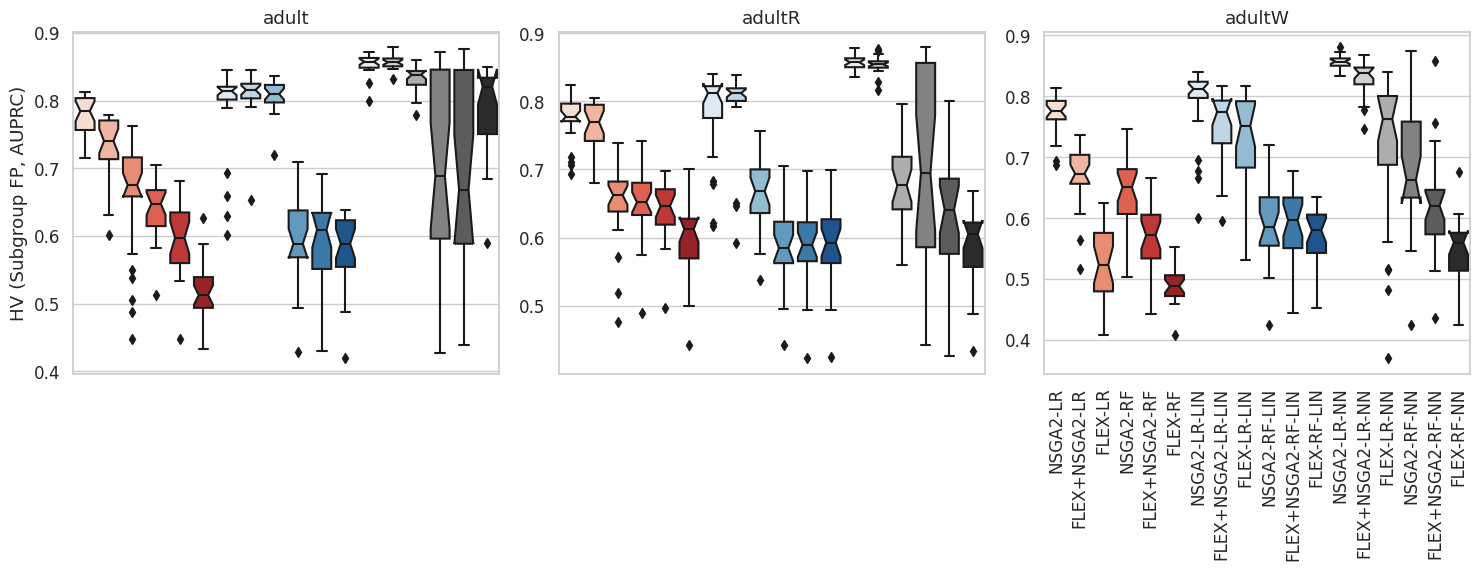

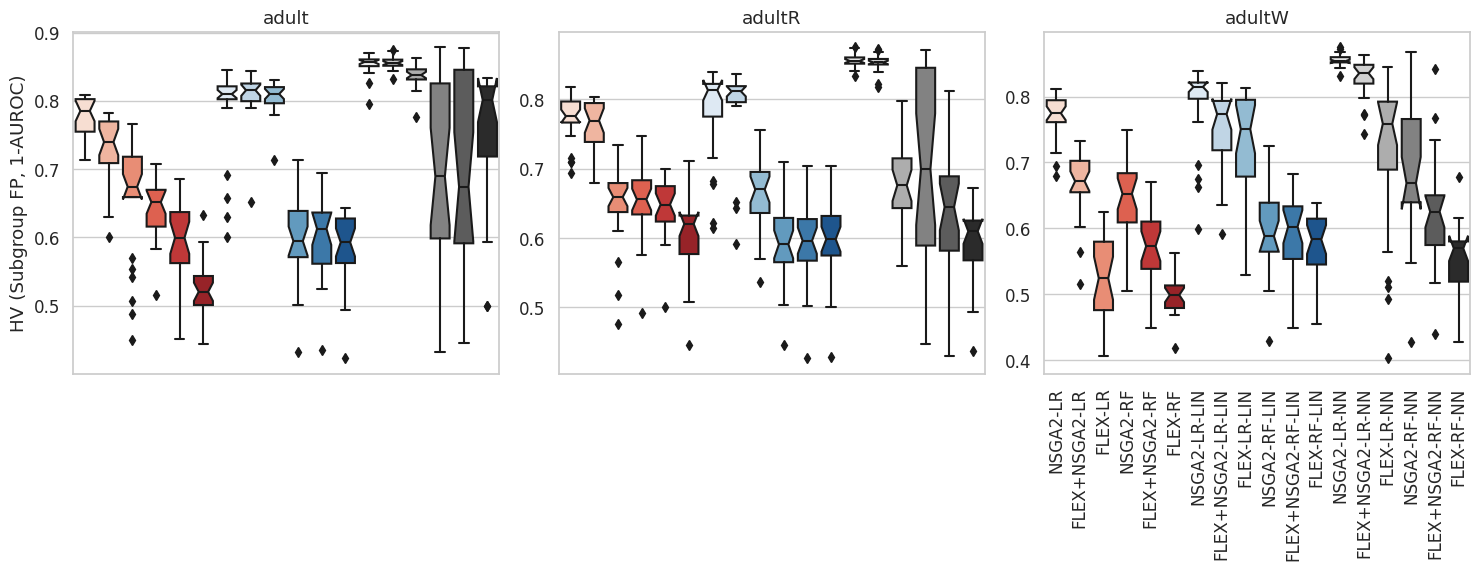

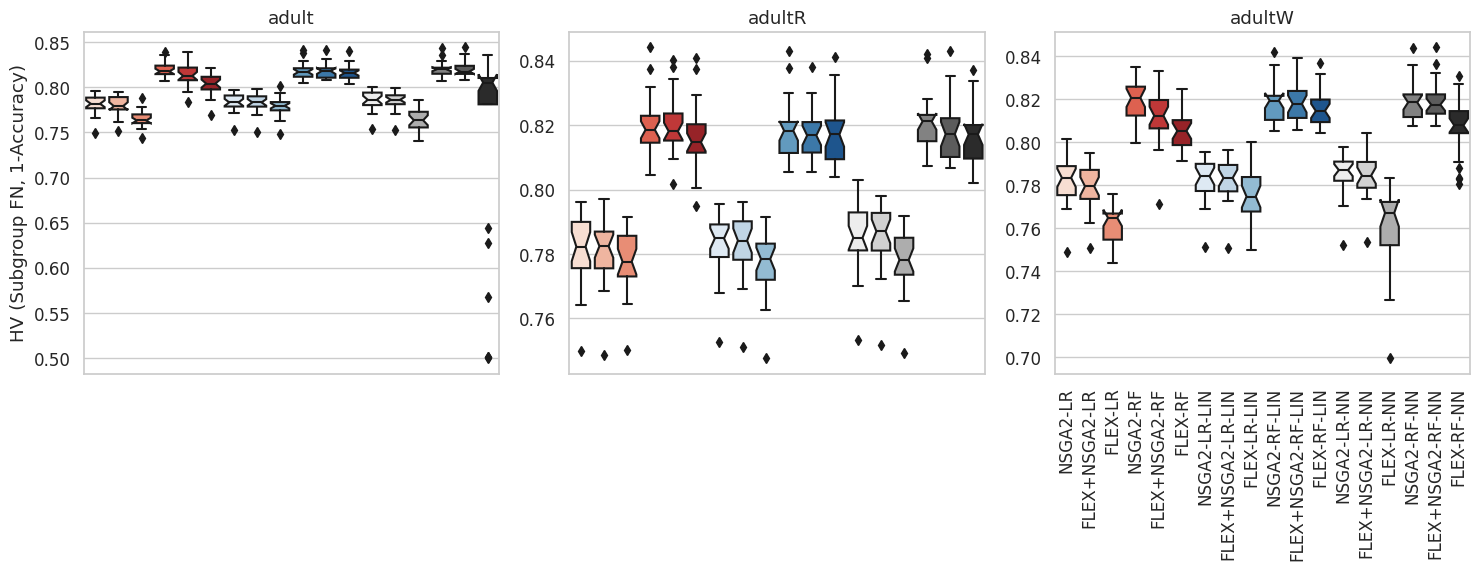

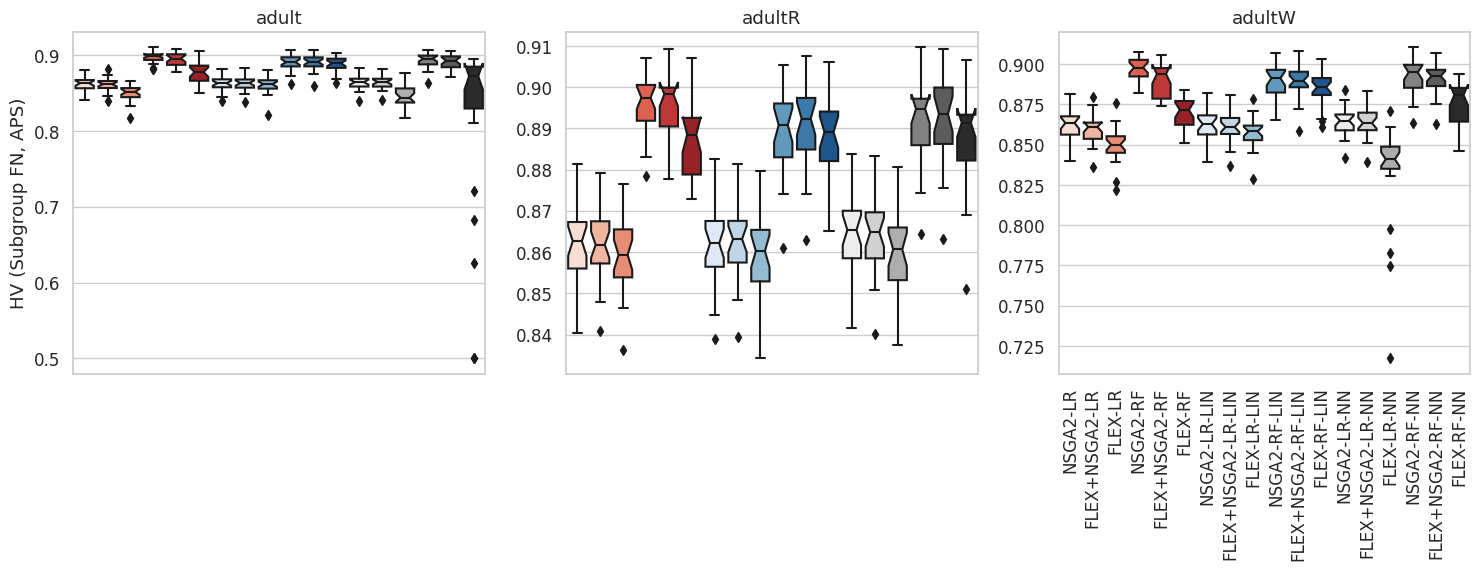

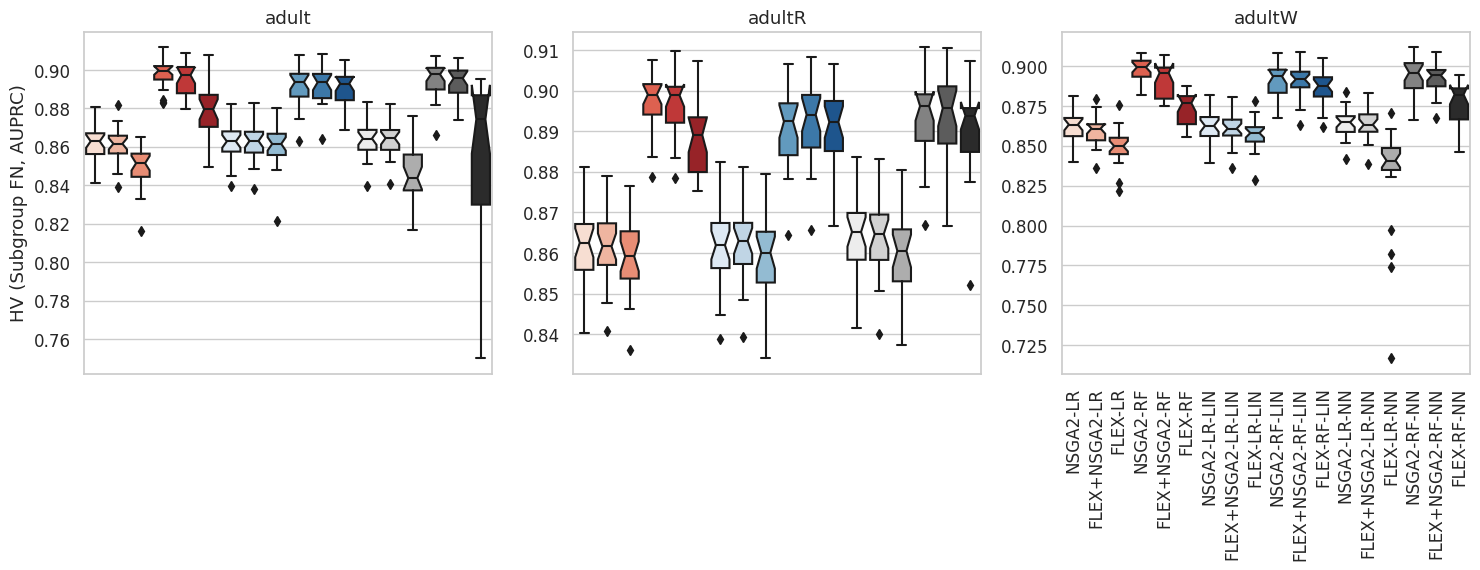

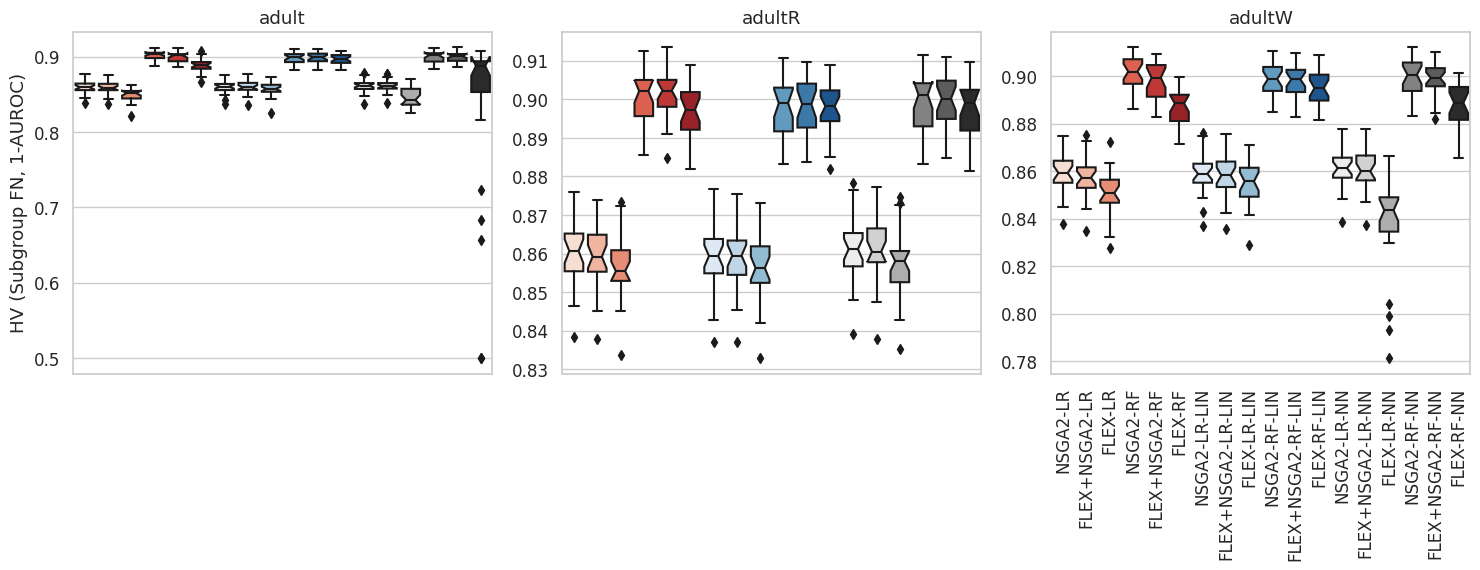

In [8]:
plot_cols = [c for c in df_all.columns if 'hv' in c]
palette_red = sns.color_palette("Reds", 6)
palette_blue = sns.color_palette("Blues", 6)
palette_green = sns.color_palette("Grays", 6)
color_palette = palette_red + palette_blue + palette_green
for col in plot_cols:
    h = plt.figure(figsize=(15,15))
    i = 1
    for dataset,dfg in df_test.groupby('dataset'):
        ax = h.add_subplot(3,3,i)
        sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette=color_palette)
        plt.title(dataset)
        y1 = metric_nice[col.split('(')[-1].split(':')[0]]
        y2 = metric_nice[col.split(':')[-1][:-1]]
        if i%3 ==1:
            plt.ylabel('HV (' + y1 +', '+y2+')')
        else:
            plt.ylabel('')
        if i < 3:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel('')
        i += 1
    
    plt.tight_layout()
    plt.savefig(figdir+'/test_'+col.replace('(','-').replace(':','-')[:-1] +'.png',
               bbox_inches='tight')

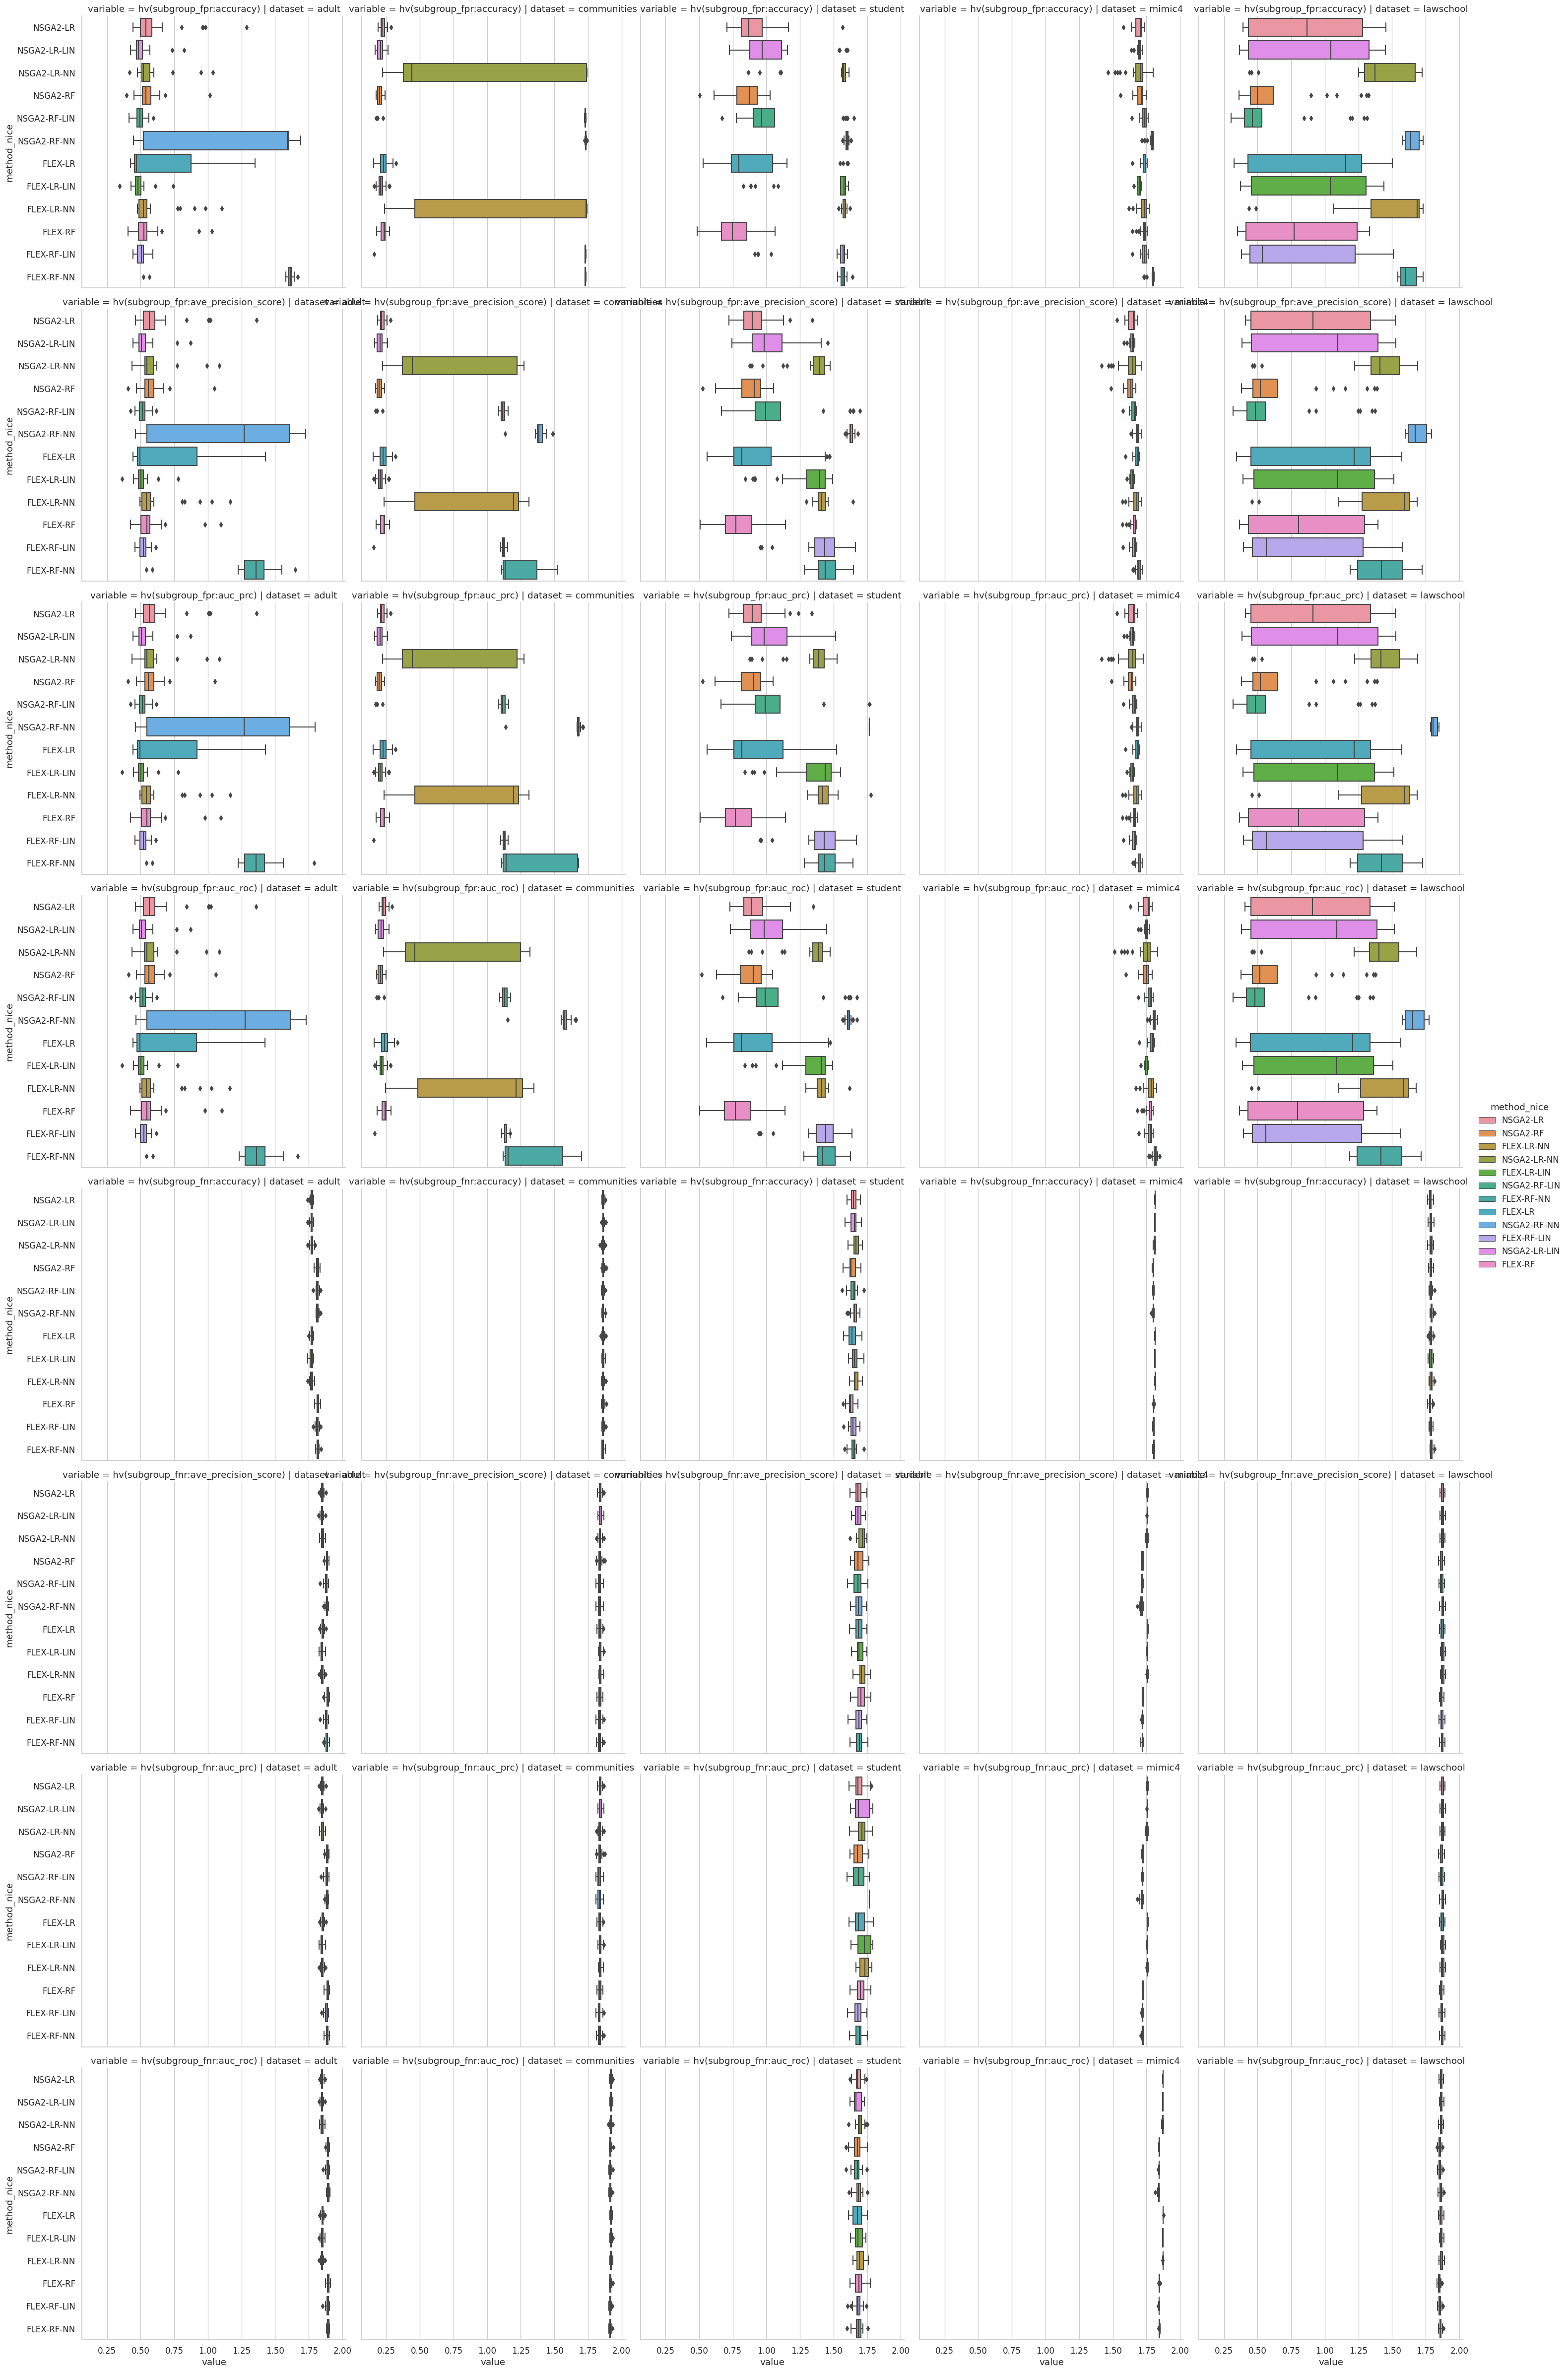

In [18]:
plot_cols = [c for c in df_all.columns if 'hv' in c]

df_plt = df_test.melt(
    value_vars = plot_cols,
    id_vars = ['method','method_nice','dataset']
)
df_plt
sns.catplot(
    kind='box',
#     kind='strip',
    data=df_plt,
    y='method_nice',
    x='value',
    hue='method_nice',
    dodge=False,
    order=OrderNice,
    row='variable',
    col='dataset',
    facet_kws=dict(
        margin_titles=True,
#         sharey=False
    ),
#     margin_titles=True,
#     sharex=False,
    height=6
)
plt.savefig('that figure')

saving figs5/hypervolume_comparison/hv_subgroup_fpr-accuracy_.png
saving figs5/hypervolume_comparison/hv_subgroup_fnr-accuracy_.png


<Figure size 1000x1000 with 0 Axes>

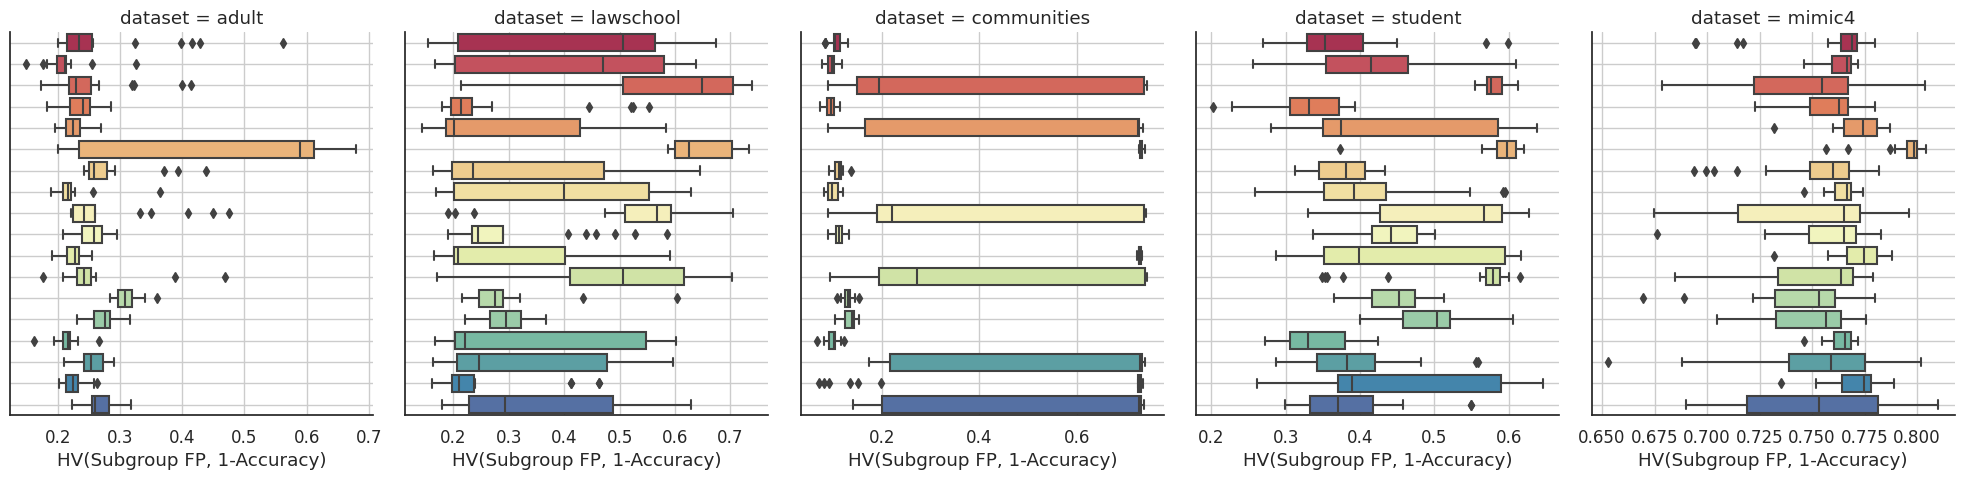

<Figure size 1000x1000 with 0 Axes>

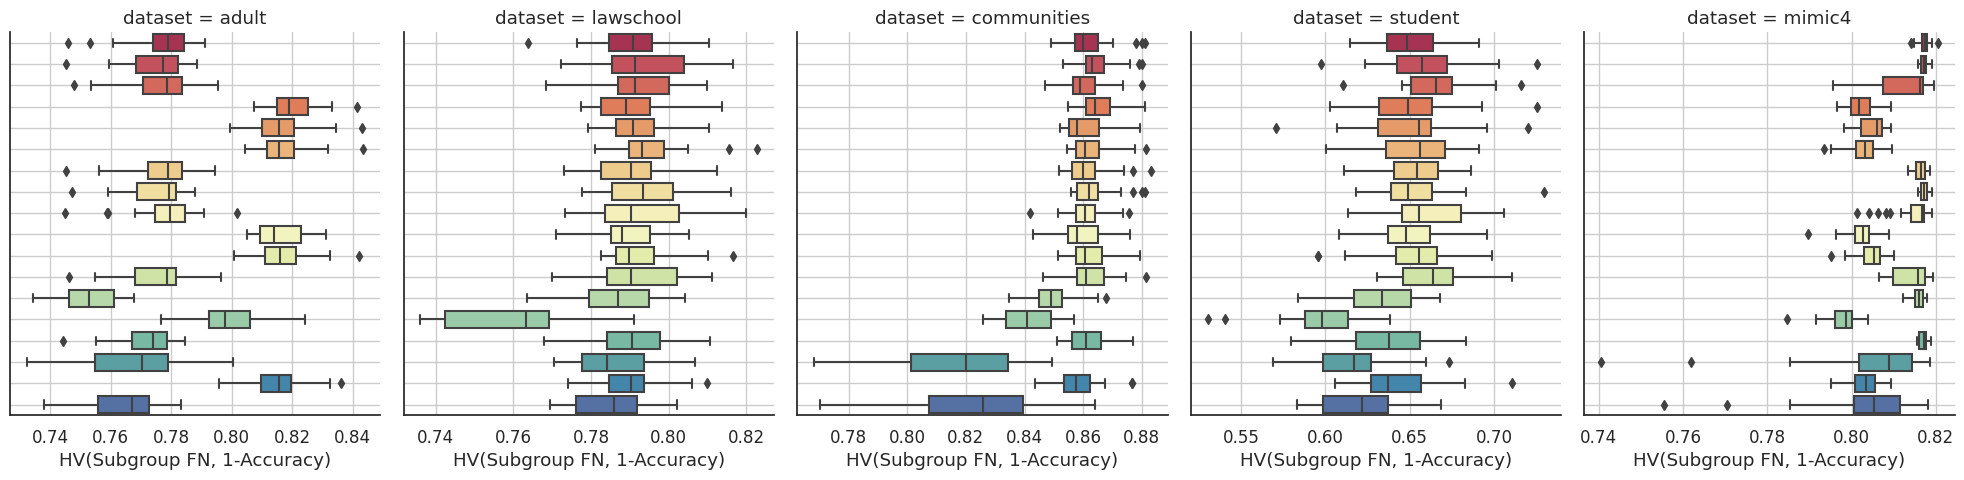

In [15]:
# test figures
sns.set_style('white')
plot_cols = [c for c in df_all.columns if 'hv' in c]
plot_cols = [
    'hv(subgroup_fpr:accuracy)',
    'hv(subgroup_fnr:accuracy)' 
]

for col in plot_cols:
    h = plt.figure(figsize=(10,10))
    i = 1
    FN = '_fn_' in col
    if FN:
        order = [o for o in Order if 'fpr' not in o.lower()]
    else:
        order = [o for o in Order if 'fnr' not in o.lower()]
        
    g = sns.catplot(
        kind='box',
        data=df_test, #.loc[df_test.dataset==dataset],
        y='method',
        x=col,
#        hue='method_nice',
        dodge=False,
#         notch=True,
#         bootstrap=10000,
        order=Order,
        palette='Spectral',
        col='dataset',
#         col_wrap=2
        sharex=False,
        aspect=0.9
    )
    g.set_xlabels(hv_nice[col])
    g.set_yticklabels([method_nice[o] for o in order])
    g.set(ylabel='')
    for k,ax in g.axes_dict.items():
        ax.grid(axis='y')  #just add this
        ax.grid(axis='x')  #just add this
#     plt.ylabel('')
    savename = f'{figdir}/{col.replace(":","-").replace("(","_").replace(")","_")}.png'
    print('saving',savename)
    plt.savefig(
        savename,
        dpi=400,
        bbox_inches='tight'
    )

# get normalized scores and rankings

In [60]:
import pdb
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
# df_norms = df_test.copy()
df_norms = pd.DataFrame()

first = True
import pdb
for col in plot_cols:
    if '_fn_' in col:
        matches = [o for o in Order if 'fpr' not in o.lower()]
    else:
        matches = [o for o in Order if 'fpr' not in o.lower()]
        
    df_match = df_test.loc[df_test.method.isin(matches)]
    df_match.loc[:,'method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    xmin = df_match[col].min()
    xmax = df_match[col].max()
    new_col = col+'_norm'
    df_match.loc[:,new_col]=df_match.groupby(['dataset'])[col].transform(
        lambda x: (x - xmin) / (xmax - xmin)
    )
    keep_cols = [new_col,'dataset','method_nice','seed']
    df_merge = df_match[keep_cols].dropna()
#     pdb.set_trace()
    if first:
        df_norms = df_merge
        first = False
    else:
        df_norms = df_norms.merge(df_merge, on=['dataset','method_nice','seed'], how='outer')
#     df_ranks.merge(df_tmp)
df_norms

plot_cols: ['hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)']


,hv(subgroup_fpr:accuracy)_norm,dataset,method_nice,seed,hv(subgroup_fpr:ave_precision_score)_norm,hv(subgroup_fpr:auc_prc)_norm,hv(subgroup_fpr:auc_roc)_norm,hv(subgroup_fnr:accuracy)_norm,hv(subgroup_fnr:ave_precision_score)_norm,hv(subgroup_fnr:auc_prc)_norm,hv(subgroup_fnr:auc_roc)_norm
0,0.487017,adult,NSGA2-LR,4719,0.517561,0.501018,0.500290,0.651556,0.826232,0.824623,0.757733
1,0.014966,communities,NSGA2-RF,24481,0.013766,0.013320,0.015308,0.916418,0.731230,0.730347,0.932178
2,0.867851,student,FLEX-LR-NN,14289,0.778182,0.751982,0.752395,0.303011,0.315560,0.312518,0.262849
3,0.877654,student,NSGA2-LR-NN,6933,0.795103,0.768611,0.766229,0.394198,0.365140,0.363739,0.310656
4,0.845772,student,FLEX-LR-LIN,24481,0.698846,0.676022,0.672316,0.316279,0.294755,0.294420,0.254466
...,...,...,...,...,...,...,...,...,...,...,...
1495,0.951590,communities,NSGA2-RF-LIN,12092,0.583615,0.565579,0.571278,0.932331,0.739355,0.738323,0.918473
1496,0.874849,student,FLEX-LR,14724,0.799975,0.784560,0.778409,0.364562,0.460721,0.459261,0.438529
1497,0.285496,adult,FLEX-RF,16695,0.305026,0.295440,0.293767,0.785654,0.956482,0.955537,0.876198
1498,0.033865,communities,NSGA2-LR,28699,0.033207,0.032139,0.034650,0.907252,0.764596,0.763348,0.937648


In [61]:
df_norms["seed"].value_counts()
# df_test.groupby(['method_nice','dataset'])
# df_test.groupby(['method_nice','dataset'])['hv(subgroup_fpr:auc_roc)'].mean().unstack()

# df_test.groupby(['method_nice'])['hv(subgroup_fpr:auc_roc)'].mean()

4719     60
4866     60
15860    60
1318     60
29756    60
8233     60
31658    60
29198    60
27690    60
13352    60
19863    60
12498    60
6832     60
24481    60
12669    60
10197    60
24284    60
6654     60
16695    60
12092    60
28699    60
14724    60
6933     60
14289    60
10132    60
Name: seed, dtype: int64

In [62]:
df_norms.groupby(['method_nice','dataset'])['hv(subgroup_fpr:auc_roc)_norm'].mean().unstack()

dataset,adult,communities,lawschool,mimic4,student
method_nice,,,,,
FLEX-LR,0.290544,0.046537,0.504271,0.964829,0.459307
FLEX-LR-LIN,0.209020,0.035306,0.454823,0.942764,0.676433
FLEX-LR-NN,0.270531,0.455070,0.741873,0.959568,0.742852
FLEX-RF,0.247013,0.044904,0.403541,0.954358,0.379719
FLEX-RF-LIN,0.215659,0.557786,0.409050,0.955620,0.722907
FLEX-RF-NN,0.687350,0.668549,0.736062,0.980194,0.761636
NSGA2-LR,0.290193,0.043048,0.432845,0.940922,0.454912
NSGA2-LR-LIN,0.220989,0.033132,0.458701,0.941529,0.513055
NSGA2-LR-NN,0.260383,0.305467,0.701413,0.931087,0.688925


In [63]:
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
df_norms = df_test.copy()

first = True
import pdb
for col in plot_cols:
    if '_fn_' in col:
        matches = [o for o in Order if 'fpr' not in o.lower()]
    else:
        matches = [o for o in Order if 'fnr' not in o.lower()]
        
    df_match = df_test.loc[df_test.method.isin(matches)]
    df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    df_tmp_med = pd.DataFrame(dtype=float)
    df_tmp_med[col] = df_match.groupby(['dataset','method_nice'])[col].median()
    df_tmp = pd.DataFrame({ "rank_"+col: df_tmp_med.groupby(['dataset'])[col].rank(ascending=True) }).reset_index()
    
    print('df_tmp:',df_tmp)
#     ranks.append(df_tmp)
    if first:
        df_ranks = df_tmp
        first = False
    else:
        df_ranks = df_ranks.merge(df_tmp, how='outer',on=['dataset','method_nice'])
df_ranks

plot_cols: ['hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)']


KeyError: 'dataset'

In [21]:
df_ranks

,dataset,method_nice,rank_hv(subgroup_fpr:accuracy),rank_hv(subgroup_fpr:ave_precision_score),rank_hv(subgroup_fpr:auc_prc),rank_hv(subgroup_fpr:auc_roc),rank_hv(subgroup_fnr:accuracy),rank_hv(subgroup_fnr:ave_precision_score),rank_hv(subgroup_fnr:auc_prc),rank_hv(subgroup_fnr:auc_roc)
0,adult,FOMO-FLEX-LR,1.0,1.0,1.0,1.0,6.0,6.0,6.0,5.0
1,adult,FOMO-FLEX-LR-LIN,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0
2,adult,FOMO-FLEX-LR-NN,6.0,6.0,6.0,6.0,2.0,4.0,4.0,1.0
3,adult,FOMO-FLEX-XGB,8.0,7.0,7.0,8.0,12.0,12.0,12.0,11.0
4,adult,FOMO-FLEX-XGB-LIN,5.0,5.0,5.0,5.0,7.0,8.0,8.0,7.0
5,adult,FOMO-FLEX-XGB-NN,12.0,12.0,12.0,12.0,11.0,10.0,10.0,12.0
6,adult,FOMO-LR,10.0,10.0,10.0,10.0,5.0,5.0,5.0,6.0
7,adult,FOMO-LR-Lin,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0
8,adult,FOMO-LR-NN,7.0,8.0,8.0,7.0,4.0,3.0,3.0,2.0
9,adult,FOMO-XGB,9.0,9.0,9.0,9.0,10.0,11.0,11.0,9.0


In [30]:
!pip install statannotations

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 6.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.0
    Uninstalling seaborn-0.13.0:
      Successfully uninstalled seaborn-0.13.0


In [34]:
!pip show statannotations

Name: statannotations
Version: 0.6.0
Summary: add statistical significance or custom annotations on seaborn plots. Based on statannot 0.2.3
Home-page: https://github.com/trevismd/statannotations
Author: 
Author-email: 
License: MIT License
Location: /home/shakiba/flex/flex/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas, scipy, seaborn
Required-by: 


In [9]:
annotator.configure?

Object `annotator.configure` not found.


('FOMO-LR', 'FOMO-LR-Lin')
('FOMO-LR', 'FOMO-LR-NN')
('FOMO-LR', 'FOMO-XGB')
('FOMO-LR', 'FOMO-XGB-Lin')
('FOMO-LR', 'FOMO-XGB-NN')
('FOMO-LR', 'FOMO-FLEX-LR')
('FOMO-LR', 'FOMO-FLEX-LR-LIN')
('FOMO-LR', 'FOMO-FLEX-LR-NN')
('FOMO-LR', 'FOMO-FLEX-XGB')
('FOMO-LR', 'FOMO-FLEX-XGB-LIN')
('FOMO-LR', 'FOMO-FLEX-XGB-NN')
('FOMO-LR-Lin', 'FOMO-LR-NN')
('FOMO-LR-Lin', 'FOMO-XGB')
('FOMO-LR-Lin', 'FOMO-XGB-Lin')
('FOMO-LR-Lin', 'FOMO-XGB-NN')
('FOMO-LR-Lin', 'FOMO-FLEX-LR')
('FOMO-LR-Lin', 'FOMO-FLEX-LR-LIN')
('FOMO-LR-Lin', 'FOMO-FLEX-LR-NN')
('FOMO-LR-Lin', 'FOMO-FLEX-XGB')
('FOMO-LR-Lin', 'FOMO-FLEX-XGB-LIN')
('FOMO-LR-Lin', 'FOMO-FLEX-XGB-NN')
('FOMO-LR-NN', 'FOMO-XGB')
('FOMO-LR-NN', 'FOMO-XGB-Lin')
('FOMO-LR-NN', 'FOMO-XGB-NN')
('FOMO-LR-NN', 'FOMO-FLEX-LR')
('FOMO-LR-NN', 'FOMO-FLEX-LR-LIN')
('FOMO-LR-NN', 'FOMO-FLEX-LR-NN')
('FOMO-LR-NN', 'FOMO-FLEX-XGB')
('FOMO-LR-NN', 'FOMO-FLEX-XGB-LIN')
('FOMO-LR-NN', 'FOMO-FLEX-XGB-NN')
('FOMO-XGB', 'FOMO-XGB-Lin')
('FOMO-XGB', 'FOMO-XGB-NN')
('FOM

FOMO-LR-NN vs. FOMO-FLEX-LR-NN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.050e+01
FOMO-XGB vs. FOMO-FLEX-XGB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.850e+01
FOMO-XGB-Lin vs. FOMO-FLEX-XGB-LIN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.950e+01
FOMO-XGB-NN vs. FOMO-FLEX-XGB-NN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.050e+01
FOMO-LR vs. FOMO-FLEX-LR-LIN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.300e+01
FOMO-LR-Lin vs. FOMO-FLEX-LR-NN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.900e+01
FOMO-LR-NN vs. FOMO-FLEX-XGB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.800e+01
FOMO-XGB vs. FOMO-FLEX-XGB-LIN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correc

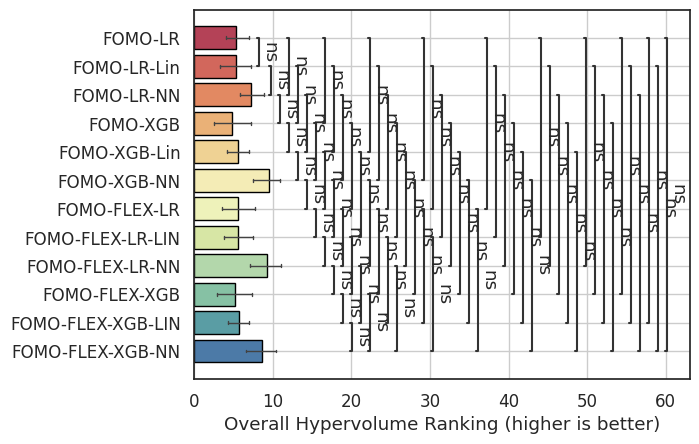

In [38]:
df_plt = df_ranks.melt(
    id_vars = [
        'method_nice',
        
    ],
    value_vars = [
        'rank_hv(subgroup_fpr:accuracy)',
        'rank_hv(subgroup_fnr:accuracy)'
    ]
)
# df_plt.method_nice = df_plt.method_nice.astype('category')
shared_args = dict(
    data=df_plt.drop(columns='variable'),
    y='method_nice',
    x='value',
    order=OrderNice,
)
ax = sns.barplot(
    **shared_args,
    palette='Spectral',
    edgecolor=(0,0,0),
    capsize=0.1,
    errwidth=1,
    fill=True,
)
# ax.set_xticklabels(
# #     ax.get_xticklabels(),
#     [x._text for x in ax.get_xticklabels()],
#     rotation=90
# )
ax.set_xlabel('Overall Hypervolume Ranking (higher is better)')
plt.ylabel('')
################################################################################
# add stat annotations
from statannotations.Annotator import Annotator
from itertools import combinations
pairs = list(combinations(OrderNice, 2) )
for p in pairs:
    print(p)
#pairs = [
#     ('GerryFair-LR', 'GerryFair-XGB'),
#    ('GerryFair-LR', 'FOMO-LR'),
#     ('GerryFair-LR', 'FOMO-LR-Lin'),
#     ('GerryFair-LR', 'FOMO-LR-NN'),
#     ('GerryFair-LR', 'FOMO-XGB'),
#    ('GerryFair-LR', 'FOMO-XGB-Lin'),
#     ('GerryFair-LR', 'FOMO-XGB-NN'),
#     ('GerryFair-XGB', 'FOMO-LR'),
#     ('GerryFair-XGB', 'FOMO-LR-Lin'),
#     ('GerryFair-XGB', 'FOMO-LR-NN'),
#    ('GerryFair-XGB', 'FOMO-XGB'),
#     ('GerryFair-XGB', 'FOMO-XGB-Lin'),
#     ('GerryFair-XGB', 'FOMO-XGB-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
#     ('FOMO-FLEX-LR-LIN', 'FOMO-FLEX-LR-NN'),
    
#    ('FOMO-LR', 'FOMO-LR-NN'),
#    ('FOMO-LR', 'FOMO-XGB'),
#     ('FOMO-LR', 'FOMO-XGB-Lin'),
#     ('FOMO-LR', 'FOMO-XGB-NN'),
#     ('FOMO-LR-Lin', 'FOMO-LR-NN'),
#     ('FOMO-LR-Lin', 'FOMO-XGB'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-NN'),
#     ('FOMO-LR-NN', 'FOMO-XGB'),
#     ('FOMO-LR-NN', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-NN', 'FOMO-XGB-NN'),
#    ('FOMO-XGB', 'FOMO-XGB-Lin'),
#    ('FOMO-XGB', 'FOMO-XGB-NN'),
#     ('FOMO-XGB-Lin', 'FOMO-XGB-NN')
#]
annotator = Annotator(
    ax,
    pairs,
    orient='h',
    **shared_args
)
annotator.configure(
    test='Mann-Whitney', 
    text_format='star', 
    loc='inside',
    comparisons_correction='bonferroni'
)
annotator.apply_and_annotate()
ax.grid(True)
plt.savefig('figs/hypervolume_comparison/rankings.', dpi=400, bbox_inches='tight')